In [ ]:
!pip install pytorch_pretrained_bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files, drive
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from keras.preprocessing.sequence import pad_sequences
from sklearn.manifold import TSNE
from zipfile import ZipFile

In [ ]:

uploaded = files.upload()

Saving antisemitismdata_ocr.csv to antisemitismdata_ocr.csv


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/antisemitismdata_ocr.csv')
df

,Unnamed: 0,id,text,classification,type_of_antisemitism,image_url,ocr
0,0,1291817243278553088,Y'all are the future.,0,NaN,https://pbs.twimg.com/media/Ee107xJXsAIYK_l.jpg,BB hh
1,1,1292750633104289792,Not what you think Propagandist PRO zionist ...,1,0.0,https://pbs.twimg.com/media/EfDF2TjXYAE_a4h.jpg,NaN
2,2,1275918779831238656,I'm probably blackpilled due to years of zog p...,1,0.0,https://pbs.twimg.com/media/EbT5XA8WsAYauDY.jpg,DI\nFORTH CARO\nROHO.
3,3,1293090052252135424,The latest proof that trump has managed to sim...,1,0.0,https://pbs.twimg.com/media/EfH6jEXUMAAziFs.jpg,Verizon\nQ4%\n12:34 AM\nforward.com\nNews » Na...
4,4,1293251961031204865,"Your Holiness, I would like to inform you that...",1,2.0,https://pbs.twimg.com/media/EfKNNTSXkAAnCBw.jpg,NaN
...,...,...,...,...,...,...,...
1216,1216,1316617182244081664,False. No peoples or nations know Egypt more s...,0,NaN,https://pbs.twimg.com/media/EkWQVebVkAIAo54.jpg,"HOLY WAR\nCONCEPT ART\n""IF I HAVE NOT CRAVED G..."
1217,1217,1316363815764791296,"When the harvest and the harvesters are small,...",0,NaN,https://pbs.twimg.com/media/EkSp6jYXcAE8sTK.jpg,NaN
1218,1218,1316626398853787650,According to a Hebrew Proverb the best investm...,0,NaN,https://pbs.twimg.com/media/EkWYr4sVgAESnUz.jpg,He is not a full man\nwho does not own a\npiec...
1219,1219,1316630714960543750,"There are two ways to find Hashem, three world...",0,NaN,https://pbs.twimg.com/media/EkWcqDsXYAAqonW.jpg,"זה ימשך עד עולם: יט (א)\nלמנצח, יבאר כי כבוד ה..."


In [ ]:
df['combined_text'] = df['text'].astype(str) + " " + df['ocr'].astype(str)
df

,Unnamed: 0,id,text,classification,type_of_antisemitism,image_url,ocr,combined_text
0,0,1291817243278553088,Y'all are the future.,0,NaN,https://pbs.twimg.com/media/Ee107xJXsAIYK_l.jpg,BB hh,Y'all are the future. BB hh
1,1,1292750633104289792,Not what you think Propagandist PRO zionist ...,1,0.0,https://pbs.twimg.com/media/EfDF2TjXYAE_a4h.jpg,NaN,Not what you think Propagandist PRO zionist ...
2,2,1275918779831238656,I'm probably blackpilled due to years of zog p...,1,0.0,https://pbs.twimg.com/media/EbT5XA8WsAYauDY.jpg,DI\nFORTH CARO\nROHO.,I'm probably blackpilled due to years of zog p...
3,3,1293090052252135424,The latest proof that trump has managed to sim...,1,0.0,https://pbs.twimg.com/media/EfH6jEXUMAAziFs.jpg,Verizon\nQ4%\n12:34 AM\nforward.com\nNews » Na...,The latest proof that trump has managed to sim...
4,4,1293251961031204865,"Your Holiness, I would like to inform you that...",1,2.0,https://pbs.twimg.com/media/EfKNNTSXkAAnCBw.jpg,NaN,"Your Holiness, I would like to inform you that..."
...,...,...,...,...,...,...,...,...
1216,1216,1316617182244081664,False. No peoples or nations know Egypt more s...,0,NaN,https://pbs.twimg.com/media/EkWQVebVkAIAo54.jpg,"HOLY WAR\nCONCEPT ART\n""IF I HAVE NOT CRAVED G...",False. No peoples or nations know Egypt more s...
1217,1217,1316363815764791296,"When the harvest and the harvesters are small,...",0,NaN,https://pbs.twimg.com/media/EkSp6jYXcAE8sTK.jpg,NaN,"When the harvest and the harvesters are small,..."
1218,1218,1316626398853787650,According to a Hebrew Proverb the best investm...,0,NaN,https://pbs.twimg.com/media/EkWYr4sVgAESnUz.jpg,He is not a full man\nwho does not own a\npiec...,According to a Hebrew Proverb the best investm...
1219,1219,1316630714960543750,"There are two ways to find Hashem, three world...",0,NaN,https://pbs.twimg.com/media/EkWcqDsXYAAqonW.jpg,"זה ימשך עד עולם: יט (א)\nלמנצח, יבאר כי כבוד ה...","There are two ways to find Hashem, three world..."


In [ ]:
#BERT needs to understand 2 things:
#1) The start and end of each sentiment
# so we declare a special token CLS which tells BERT that its a classification task
tweets = df['text']
tweet = ["[CLS] "+str(i)+" [SEP]" for i in tweets]

# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Restricting the max size of Tokens to 512(BERT doest accept any more than this)
tokenized_texts = list(map(lambda t: tokenizer.tokenize(t)[:510] , tweet))
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

labels = list(df['classification']) #storing the labels

# Set the maximum sequence length. 
MAX_LEN = 128

# Pad our input tokens so that everything has a uniform length
input_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, tokenized_texts)),
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")


x_traincv = input_ids
print(len(input_ids))
print(x_traincv)


100%|██████████| 231508/231508 [00:00<00:00, 3570656.09B/s]


Tokenize the first sentence:
['[CLS]', 'y', "'", 'all', 'are', 'the', 'future', '.', '[SEP]']
1221
[[ 101 1061 1005 ...    0    0    0]
 [ 101 2025 2054 ...    0    0    0]
 [ 101 1045 1005 ...    0    0    0]
 ...
 [ 101 2429 2000 ...    0    0    0]
 [ 101 2045 2024 ...    0    0    0]
 [ 101 2051 2000 ...    0    0    0]]


In [ ]:
X = np.array(df['text'])
Y = np.array(df['classification'])
k = np.unique(Y)

In [ ]:
#tsne embedding
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_traincv)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


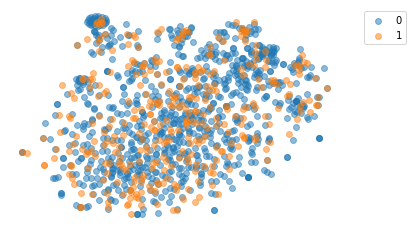

In [ ]:
#plot tsne embedding
for c in np.unique(Y):
  idx = np.where(Y[:]==c)[0]
  plt.scatter(x=tsne[idx,0], y=tsne[idx,1], s=35, alpha=0.5, label=k[c])

plt.axis('off')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
#plt.savefig("/content/drive/MyDrive/tsnePlots/BERTantisemitismPlot.pdf", bbox_inches='tight')
plt.show()